In [42]:
figdir = '../../figure/potential'

os.makedirs(figdir, exist_ok=True)

In [41]:
λ_lat = 1064e-9
k_lat = 2*np.pi / λ_lat

w_0_lat = 150e-6
z_R_lat = np.pi * w_0_lat**2 / λ_lat
z_R_lat

0.06643405517459618

In [2]:
λ_per = 532e-9
k_per = 2*np.pi / λ_per

w_0_per = 1e-6
z_R_per = np.pi * w_0_per**2 / λ_per
z_R_per

5.905249348852994e-06

In [47]:
N = 50
a_0 = λ_lat / 2

L = N*a_0 / 2

z = -L + 2*L*np.linspace(0, 1, 1000)

V_0_lat = -10
V_0_per = +2

V_lat = V_0_lat * np.cos(k_lat * z) ** 2
V_per = V_0_per / (1 + (z / z_R_per)**2)

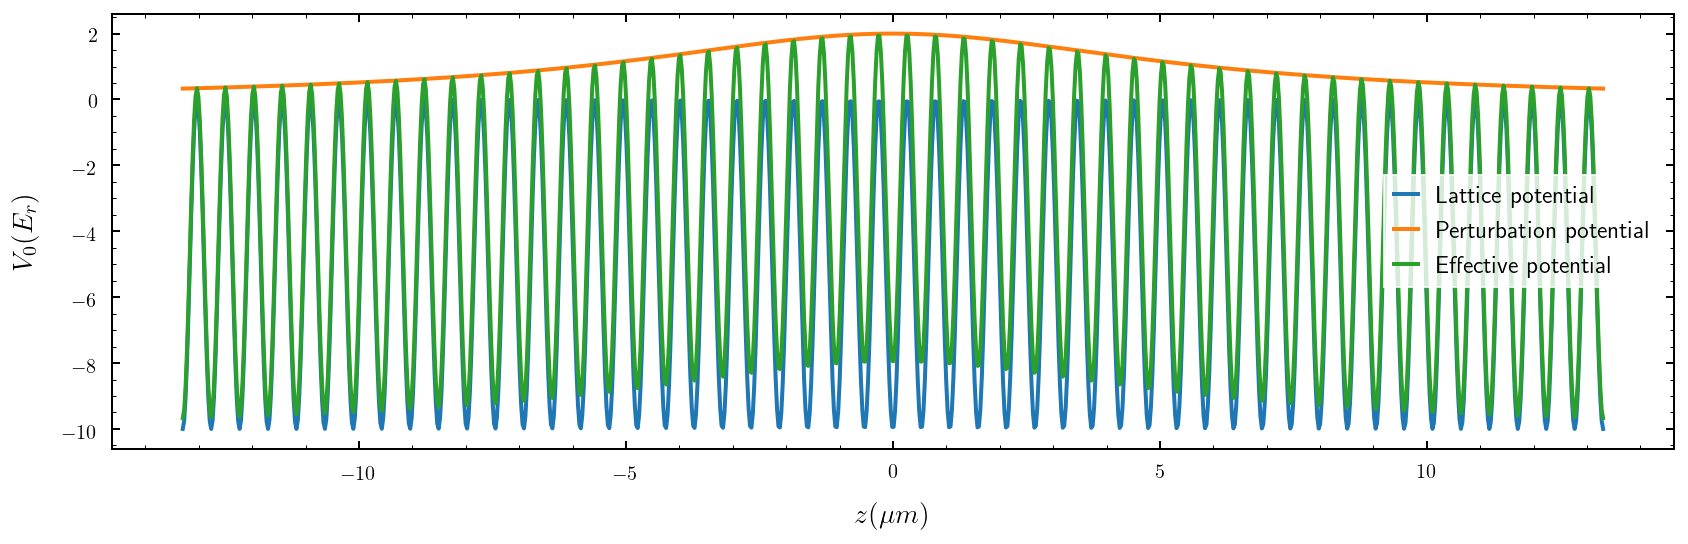

In [48]:
plt.figure(figsize=(14, 4))
plt.plot(z / 1e-6, V_lat, label='Lattice potential')
plt.plot(z / 1e-6, V_per, label='Perturbation potential')
plt.plot(z / 1e-6, V_lat + V_per, label='Effective potential')
plt.xlabel('$z (\mu m)$')
plt.ylabel('$V_0 (E_r)$')
plt.legend()
plt.show()

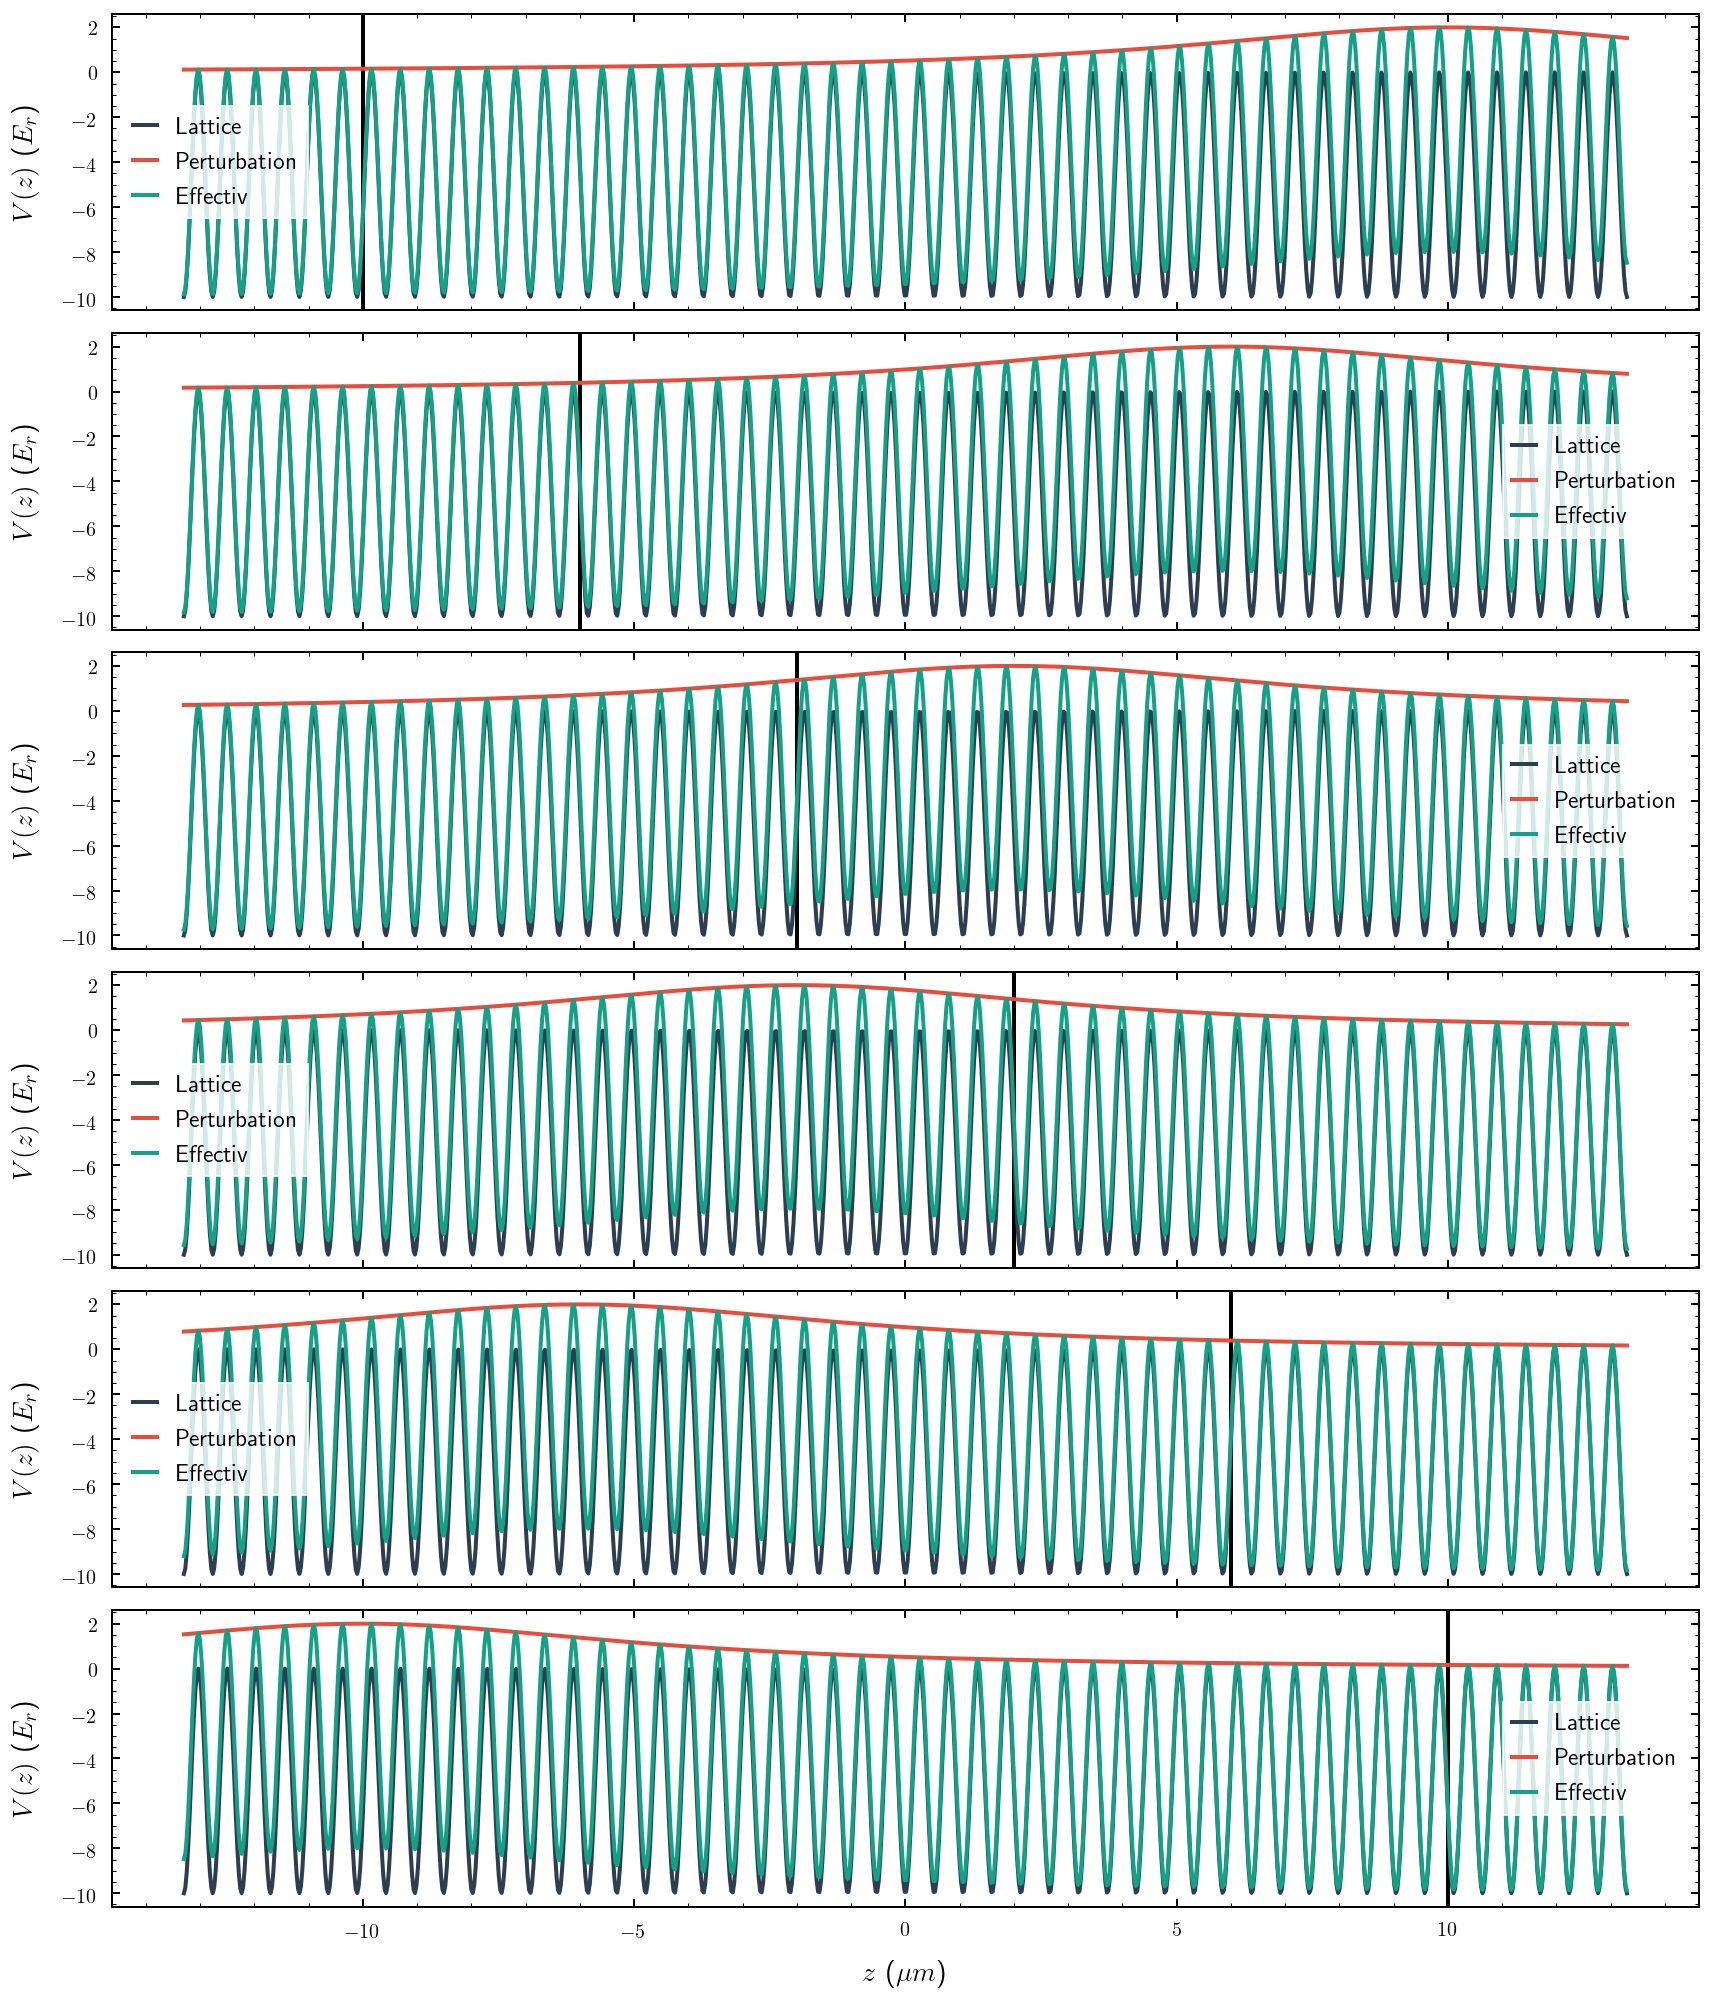

In [49]:
fig, axes = plt.subplots(nrows=6, figsize=(12, 14), sharex=True)

for i in range(6):
    l = -10e-6 + 20e-6*i / 5
    
    V_per = V_0_per / (1 + ((z+l) / z_R_per)**2)
    
#    axes[i].set_title(f'Potential perturbation at {l / 1e-6:.2f} $\mu m$')
    axes[i].axvline(l / 1e-6, color='black')
    axes[i].plot(z / 1e-6, V_lat, label='Lattice', color='#2c3e50')
    axes[i].plot(z / 1e-6, V_per, label='Perturbation', color='#e74c3c')
    axes[i].plot(z / 1e-6, V_lat + V_per, label='Effectiv', color='#16a085')
    axes[i].set_ylabel('$V(z)$ ($E_r$)')
    axes[i].legend()

axes[-1].set_xlabel('$z$ ($\mu m$)')
    
plt.tight_layout()
plt.savefig(os.path.join(figdir, 'evolution.pdf'))
plt.show()

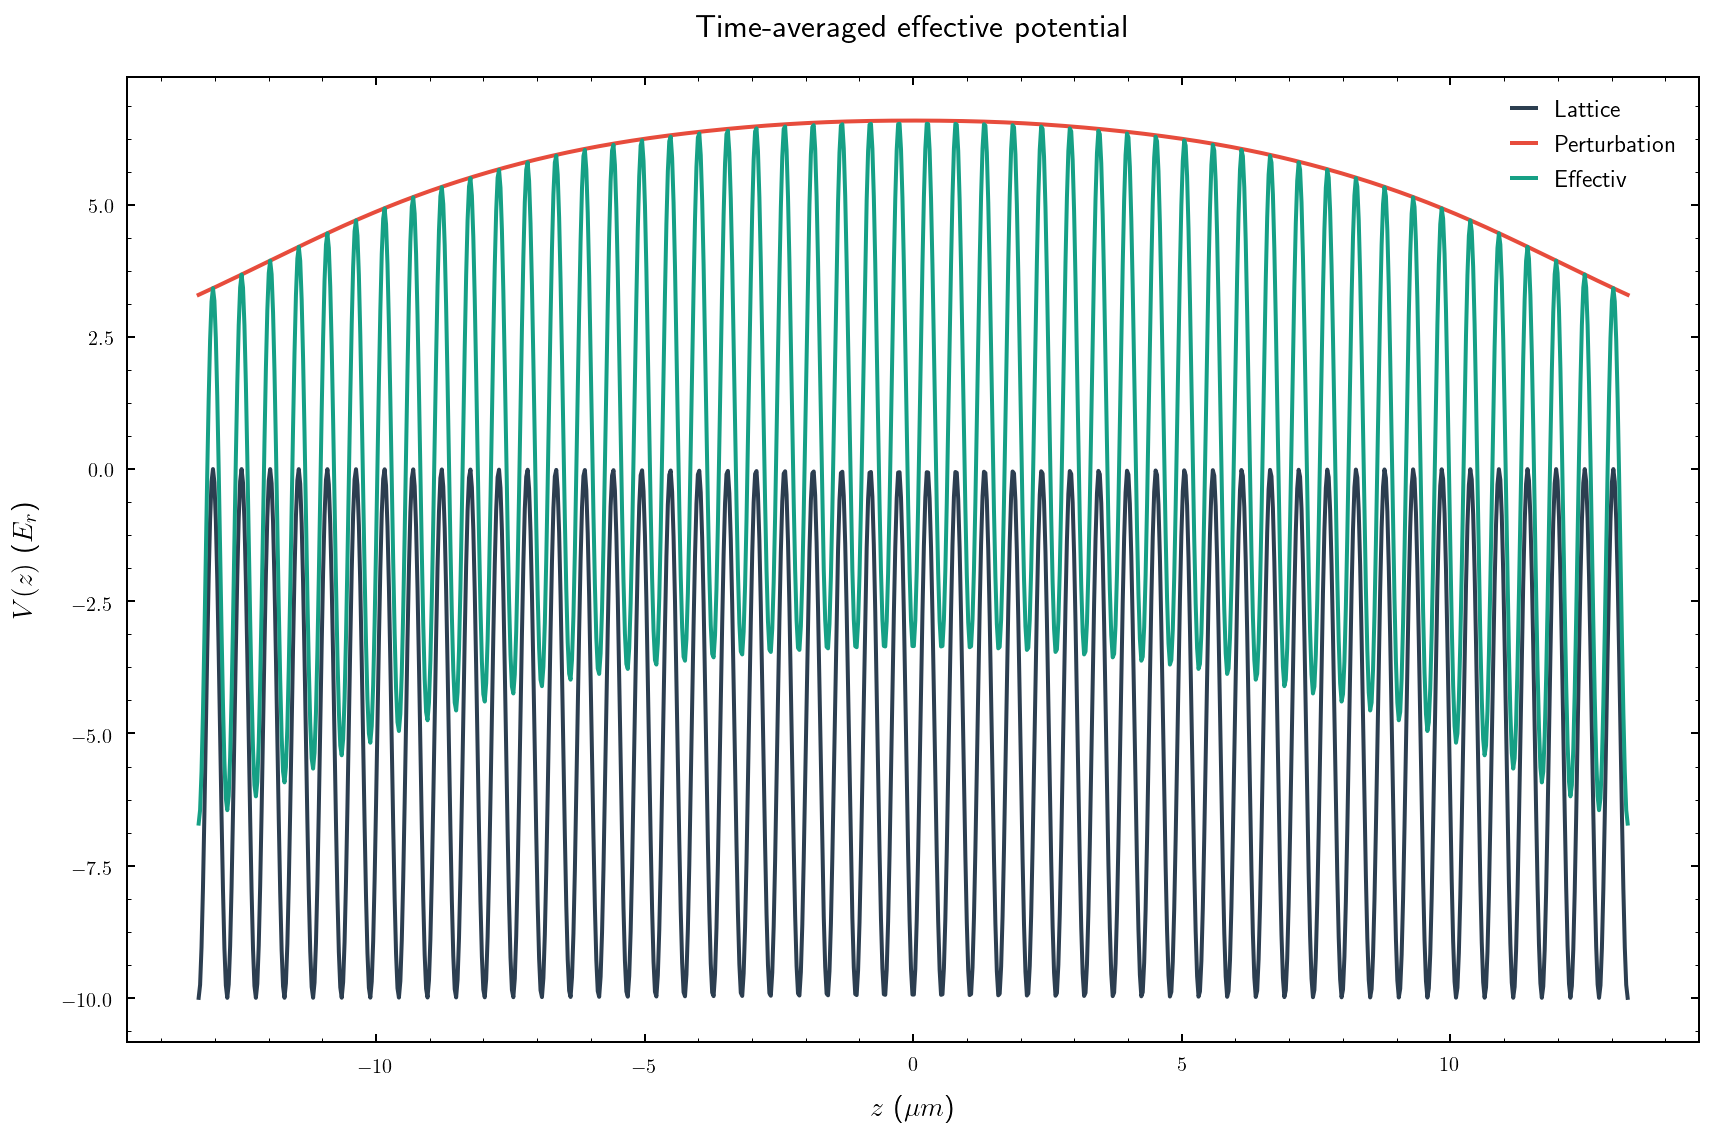

In [51]:
plt.figure(figsize=(12, 8))

V_per = 0

for i in range(6):
    l = -10e-6 + 20e-6*i / 5
    
    V_per += V_0_per / (1 + ((z+l) / z_R_per)**2)

V_per / 6

plt.plot(z / 1e-6, V_lat, label='Lattice', color='#2c3e50')
plt.plot(z / 1e-6, V_per, label='Perturbation', color='#e74c3c')
plt.plot(z / 1e-6, V_lat + V_per, label='Effectiv', color='#16a085')
plt.ylabel('$V(z)$ ($E_r$)')
plt.xlabel('$z$ ($\mu m$)')
plt.title('Time-averaged effective potential')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figdir, 'effective.pdf'))
plt.show()